# PROJECT UNDERSTANDING

## Project Brief Information

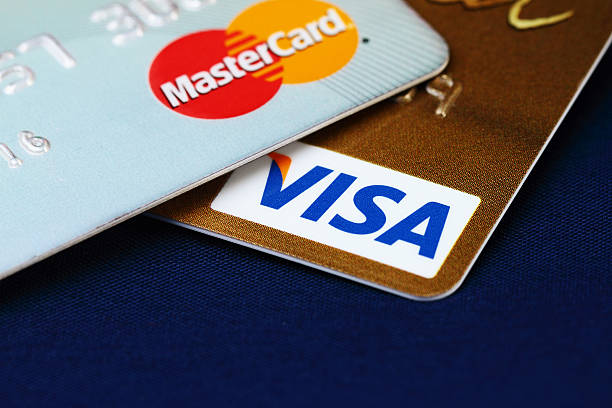

This project is technical test for data analyst position at Mandiri Sekuritas

The test done by utilizing the public dataset for debit/credit card usage

The data retrieved from 3 datasets :

**user_data** : contains the information related to user (id, address, age, income, etc)

**card_data** : contains informations related to cards used in transaction (brand, type, credit_limit, etc)

**transactions_data** : contains information related to the transactional activites (date, amount, id, user_id, card_id, merchant, etc)


## Projects Output

The output of the projects are



*   SQL documentation

*   Analysis file


*   Looker Studio dashboard

*   Readme File





***This file will served as SQL documentation, cotains detail of SQL query run to retrieved the data***

The SQL Query process done by utilizing GOOGLE BIGQUERY

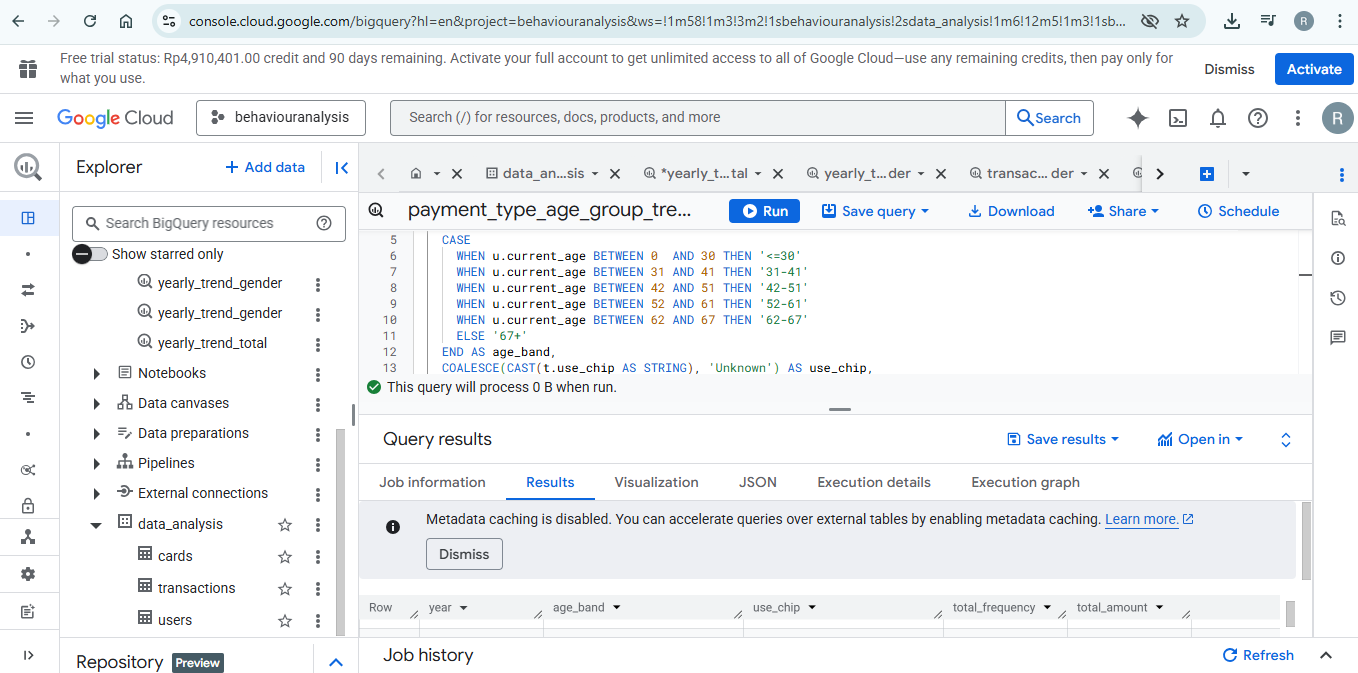

Link to the working console : https://console.cloud.google.com/bigquery?ws=!1m4!1m3!3m2!1sbehaviouranalysis!2sdata_analysis

Looker Studio Dashboard : https://lookerstudio.google.com/reporting/d02ddf1b-ce50-431e-b613-c057924c28d5

# DATABASE UNDERSTANDING

##Import Essential Modules

In [7]:
# module to import the dataset from google drive#
import gdown
from io import BytesIO

# Libraries for visualization, cleaning, etc

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

## Read the CARDS DATABASE

In [8]:
# READ THE CARDS DATABASE

url = "https://drive.google.com/file/d/1J7WtxidlkbD0QTJNssO1zVpQgvdMxhTg/view?usp=sharing"

# extracting location of file_id from the google drive url

file_id = url.split('/d/')[1].split('/')[0]

download_url = f"https://drive.google.com/uc?id={file_id}" # the file id implement to direct download link. Forcing GDRIVE to direct download it

# TEMPORARY FILE

cards_data = "cards_data.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, cards_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1J7WtxidlkbD0QTJNssO1zVpQgvdMxhTg
To: /content/cards_data.csv
100%|██████████| 510k/510k [00:00<00:00, 54.5MB/s]


'cards_data.csv'

In [9]:
# TESTING THE CARDS DATABASE

cards = pd.read_csv(cards_data)
display(cards.head(), cards.tail())

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
6141,5361,185,Amex,Credit,300609782832003,01/2024,663,YES,1,$6900,11/2000,2013,No
6142,2711,185,Visa,Credit,4718517475996018,01/2021,492,YES,2,$5700,04/2012,2012,No
6143,1305,1007,Mastercard,Credit,5929512204765914,08/2020,237,NO,2,$9200,02/2012,2012,No
6144,743,1110,Mastercard,Debit,5589768928167462,01/2020,630,YES,1,$28074,01/2020,2020,No
6145,3199,1110,Visa,Credit,4994011318343994,12/2020,120,YES,1,$14400,05/2017,2017,No


## Read the USER DATABASE

In [10]:
# READ THE USER DATABASE

url = "https://drive.google.com/file/d/1rARXtcwQDSp2ouWgIE_LumY8egvMC8vd/view?usp=sharing"

# extracting location of file_id from the google drive url

file_id = url.split('/d/')[1].split('/')[0]

download_url = f"https://drive.google.com/uc?id={file_id}" # the file id implement to direct download link. Forcing GDRIVE to direct download it

# TEMPORARY FILE

user_data = "user_data.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, user_data, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1rARXtcwQDSp2ouWgIE_LumY8egvMC8vd
To: /content/user_data.csv
100%|██████████| 165k/165k [00:00<00:00, 92.4MB/s]


'user_data.csv'

In [11]:
# CHECKING THE USER DATABASE

users = pd.read_csv(user_data)
display(users.head(), users.tail())

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
1995,986,32,70,1987,7,Male,6577 Lexington Lane,40.65,-73.58,$23550,$48010,$87837,703,3
1996,1944,62,65,1957,11,Female,2 Elm Drive,38.95,-84.54,$24218,$49378,$104480,740,4
1997,185,47,67,1973,1,Female,276 Fifth Boulevard,40.66,-74.19,$15175,$30942,$71066,779,3
1998,1007,66,60,1954,2,Male,259 Valley Boulevard,40.24,-76.92,$25336,$54654,$27241,618,1
1999,1110,21,60,1998,11,Female,472 Ocean View Street,42.86,-71.48,$32325,$65909,$181261,673,2


## Read the TRANSACTIONS DATABASE

In [12]:
# READ THE CARDS DATABASE

url = "https://drive.google.com/file/d/1Zv8mKHNVHHUqfzeYFk9fmL_BRtVHDMHw/view?usp=sharing"

# extracting location of file_id from the google drive url

file_id = url.split('/d/')[1].split('/')[0]

download_url = f"https://drive.google.com/uc?id={file_id}" # the file id implement to direct download link. Forcing GDRIVE to direct download it

# TEMPORARY FILE

transactions_data = "transactions_data.csv"

# SAVING FILE TO LOCAL DIRECTORY
gdown.download(download_url, transactions_data, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1Zv8mKHNVHHUqfzeYFk9fmL_BRtVHDMHw
From (redirected): https://drive.google.com/uc?id=1Zv8mKHNVHHUqfzeYFk9fmL_BRtVHDMHw&confirm=t&uuid=d95ca11d-bd2e-45ab-bc31-e8cf43911409
To: /content/transactions_data.csv
100%|██████████| 1.26G/1.26G [00:15<00:00, 83.1MB/s]


'transactions_data.csv'

In [3]:
# TESTING THE TRANSACTIONS DATABASE

transactions = pd.read_csv(transactions_data)
display(transactions.head(), transactions.tail())

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475327,2010-01-01 00:01:00,1556,2972,$-77.00,Swipe Transaction,59935,Beulah,ND,58523.0,5499,NaN
1,7475328,2010-01-01 00:02:00,561,4575,$14.57,Swipe Transaction,67570,Bettendorf,IA,52722.0,5311,NaN
2,7475329,2010-01-01 00:02:00,1129,102,$80.00,Swipe Transaction,27092,Vista,CA,92084.0,4829,NaN
3,7475331,2010-01-01 00:05:00,430,2860,$200.00,Swipe Transaction,27092,Crown Point,IN,46307.0,4829,NaN
4,7475332,2010-01-01 00:06:00,848,3915,$46.41,Swipe Transaction,13051,Harwood,MD,20776.0,5813,NaN


,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
13305910,23761868,2019-10-31 23:56:00,1718,2379,$1.11,Chip Transaction,86438,West Covina,CA,91792.0,5499,NaN
13305911,23761869,2019-10-31 23:56:00,1766,2066,$12.80,Online Transaction,39261,ONLINE,NaN,NaN,5815,NaN
13305912,23761870,2019-10-31 23:57:00,199,1031,$40.44,Swipe Transaction,2925,Allen,TX,75002.0,4900,NaN
13305913,23761873,2019-10-31 23:58:00,1986,5443,$4.00,Chip Transaction,46284,Daly City,CA,94014.0,5411,NaN
13305914,23761874,2019-10-31 23:59:00,489,5697,$12.88,Chip Transaction,24658,Greenbrier,TN,37073.0,5921,NaN


## QUICK OVERVIEW OF DATASET

### Quick overview 'transactions' dataset

In [13]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13305915 entries, 0 to 13305914
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   id              int64  
 1   date            object 
 2   client_id       int64  
 3   card_id         int64  
 4   amount          object 
 5   use_chip        object 
 6   merchant_id     int64  
 7   merchant_city   object 
 8   merchant_state  object 
 9   zip             float64
 10  mcc             int64  
 11  errors          object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.2+ GB


In [14]:
# OBSERVE THE DATA SAMPLE IN EACH COLUMNS

pd.set_option('display.max_colwidth',1) # to automatically set the length of the table

listItem = [] #blank list to be populated

for col in transactions.columns:
  listItem.append([col, transactions[col].dtypes, transactions[col].nunique(), transactions[col].unique()])



unique_data_transactions = pd.DataFrame(columns = ['Column_Name', 'Data_Type', 'Number_Unique_Data', 'Uniqe_Data'], data = listItem)

unique_data_transactions

,Column_Name,Data_Type,Number_Unique_Data,Uniqe_Data
0,id,int64,13305915,"[7475327, 7475328, 7475329, 7475331, 7475332, 7475333, 7475334, 7475335, 7475336, 7475337, 7475338, 7475339, 7475340, 7475341, 7475342, 7475343, 7475344, 7475345, 7475346, 7475347, 7475348, 7475349, 7475350, 7475351, 7475353, 7475354, 7475356, 7475357, 7475358, 7475359, 7475360, 7475361, 7475362, 7475363, 7475364, 7475365, 7475366, 7475367, 7475368, 7475370, 7475371, 7475372, 7475373, 7475374, 7475376, 7475377, 7475378, 7475379, 7475380, 7475381, 7475382, 7475383, 7475385, 7475388, 7475389, 7475390, 7475391, 7475394, 7475395, 7475396, 7475397, 7475398, 7475399, 7475400, 7475401, 7475402, 7475403, 7475404, 7475406, 7475407, 7475410, 7475411, 7475412, 7475413, 7475414, 7475415, 7475416, 7475417, 7475419, 7475420, 7475421, 7475422, 7475423, 7475424, 7475425, 7475426, 7475427, 7475429, 7475430, 7475431, 7475432, 7475434, 7475435, 7475436, 7475437, 7475438, 7475439, 7475440, 7475441, 7475442, ...]"
1,date,object,4136496,"[2010-01-01 00:01:00, 2010-01-01 00:02:00, 2010-01-01 00:05:00, 2010-01-01 00:06:00, 2010-01-01 00:07:00, 2010-01-01 00:09:00, 2010-01-01 00:14:00, 2010-01-01 00:21:00, 2010-01-01 00:23:00, 2010-01-01 00:26:00, 2010-01-01 00:27:00, 2010-01-01 00:30:00, 2010-01-01 00:31:00, 2010-01-01 00:32:00, 2010-01-01 00:34:00, 2010-01-01 00:36:00, 2010-01-01 00:37:00, 2010-01-01 00:38:00, 2010-01-01 00:43:00, 2010-01-01 00:45:00, 2010-01-01 00:46:00, 2010-01-01 00:48:00, 2010-01-01 00:49:00, 2010-01-01 00:53:00, 2010-01-01 00:56:00, 2010-01-01 00:57:00, 2010-01-01 01:01:00, 2010-01-01 01:03:00, 2010-01-01 01:06:00, 2010-01-01 01:07:00, 2010-01-01 01:08:00, 2010-01-01 01:11:00, 2010-01-01 01:13:00, 2010-01-01 01:19:00, 2010-01-01 01:22:00, 2010-01-01 01:23:00, 2010-01-01 01:25:00, 2010-01-01 01:30:00, 2010-01-01 01:37:00, 2010-01-01 01:40:00, 2010-01-01 01:41:00, 2010-01-01 01:46:00, 2010-01-01 01:47:00, 2010-01-01 01:48:00, 2010-01-01 01:53:00, 2010-01-01 01:54:00, 2010-01-01 01:55:00, 2010-01-01 01:56:00, 2010-01-01 01:58:00, 2010-01-01 02:00:00, 2010-01-01 02:05:00, 2010-01-01 02:06:00, 2010-01-01 02:07:00, 2010-01-01 02:08:00, 2010-01-01 02:09:00, 2010-01-01 02:11:00, 2010-01-01 02:12:00, 2010-01-01 02:13:00, 2010-01-01 02:14:00, 2010-01-01 02:15:00, 2010-01-01 02:16:00, 2010-01-01 02:17:00, 2010-01-01 02:22:00, 2010-01-01 02:25:00, 2010-01-01 02:28:00, 2010-01-01 02:31:00, 2010-01-01 02:32:00, 2010-01-01 02:33:00, 2010-01-01 02:35:00, 2010-01-01 02:39:00, 2010-01-01 02:40:00, 2010-01-01 02:44:00, 2010-01-01 02:45:00, 2010-01-01 02:48:00, 2010-01-01 02:51:00, 2010-01-01 02:52:00, 2010-01-01 02:57:00, 2010-01-01 02:59:00, 2010-01-01 03:02:00, 2010-01-01 03:03:00, 2010-01-01 03:06:00, 2010-01-01 03:08:00, 2010-01-01 03:09:00, 2010-01-01 03:11:00, 2010-01-01 03:13:00, 2010-01-01 03:16:00, 2010-01-01 03:17:00, 2010-01-01 03:20:00, 2010-01-01 03:23:00, 2010-01-01 03:26:00, 2010-01-01 03:27:00, 2010-01-01 03:29:00, 2010-01-01 03:32:00, 2010-01-01 03:36:00, 2010-01-01 03:49:00, 2010-01-01 03:51:00, 2010-01-01 03:52:00, 2010-01-01 03:53:00, 2010-01-01 03:56:00, 2010-01-01 03:57:00, ...]"
2,client_id,int64,1219,"[1556, 561, 1129, 430, 848, 1807, 1684, 335, 351, 554, 605, 1797, 114, 1634, 646, 394, 1376, 1682, 121, 301, 1755, 566, 379, 401, 1127, 652, 1963, 1357, 285, 1201, 820, 1703, 1758, 414, 1642, 989, 1519, 1575, 986, 1484, 1077, 1787, 247, 1087, 1731, 125, 63, 152, 597, 1449, 760, 1542, 727, 1097, 1453, 1024, 858, 1084, 1622, 34, 1424, 474, 1142, 241, 461, 1776, 595, 972, 212, 1214, 178, 1155, 1443, 387, 1998, 706, 503, 714, 908, 758, 1411, 140, 843, 895, 1313, 1459, 1802, 702, 169, 957, 1921, 1920, 319, 613, 609, 1209, 819, 1237, 1538, 1686, ...]"
3,card_id,int64,4071,"[2972, 4575, 102, 2860, 3915, 165, 2140, 5131, 1112, 3912, 5061, 1127, 3398, 2464, 2093, 5492, 4717, 2182, 238, 5952, 3742, 4228, 3439, 3881, 3004, 3869, 4293, 3317, 4488, 3442, 16, 127, 2969, 4686, 2815, 3364, 3764, 5577, 4281, 94, 2511, 2452, 2112, 4755, 5768, 65, 2527, 2539, 2228, 4155, 

### Quick overview 'user' dataset

In [16]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 2000 non-null   int64  
 1   current_age        2000 non-null   int64  
 2   retirement_age     2000 non-null   int64  
 3   birth_year         2000 non-null   int64  
 4   birth_month        2000 non-null   int64  
 5   gender             2000 non-null   object 
 6   address            2000 non-null   object 
 7   latitude           2000 non-null   float64
 8   longitude          2000 non-null   float64
 9   per_capita_income  2000 non-null   object 
 10  yearly_income      2000 non-null   object 
 11  total_debt         2000 non-null   object 
 12  credit_score       2000 non-null   int64  
 13  num_credit_cards   2000 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 218.9+ KB


In [17]:
# OBSERVE THE DATA SAMPLE IN EACH COLUMNS

pd.set_option('display.max_colwidth',1) # to automatically set the length of the table

listItem = [] #blank list to be populated

for col in users.columns:
  listItem.append([col, users[col].dtypes, users[col].nunique(), users[col].unique()])



unique_data_users = pd.DataFrame(columns = ['Column_Name', 'Data_Type', 'Number_Unique_Data', 'Uniqe_Data'], data = listItem)

unique_data_users

,Column_Name,Data_Type,Number_Unique_Data,Uniqe_Data
0,id,int64,2000,"[825, 1746, 1718, 708, 1164, 68, 1075, 1711, 1116, 1752, 192, 640, 1679, 1094, 1590, 1660, 1747, 153, 429, 511, 309, 777, 1946, 1674, 482, 877, 128, 775, 1536, 140, 1884, 1874, 1310, 1689, 379, 34, 822, 1499, 1780, 1806, 811, 1844, 1852, 1231, 970, 381, 1134, 1296, 1880, 322, 461, 1165, 1448, 1288, 1178, 1391, 838, 54, 1452, 1602, 1938, 1492, 688, 749, 643, 1219, 1198, 898, 882, 348, 633, 1493, 1161, 217, 1877, 668, 533, 203, 1738, 713, 1631, 1487, 1265, 370, 1014, 290, 985, 135, 307, 1783, 1321, 1511, 900, 953, 233, 406, 1069, 180, 996, 1866, ...]"
1,current_age,int64,80,"[53, 81, 63, 43, 42, 36, 26, 34, 27, 29, 18, 48, 41, 54, 76, 22, 66, 28, 70, 45, 40, 37, 49, 33, 21, 47, 51, 46, 59, 91, 79, 57, 60, 61, 55, 44, 82, 90, 30, 23, 65, 87, 58, 25, 32, 64, 52, 75, 62, 56, 35, 24, 19, 20, 39, 86, 67, 83, 68, 92, 84, 38, 80, 31, 50, 77, 88, 101, 74, 73, 85, 78, 72, 69, 71, 89, 98, 93, 94, 99]"
2,retirement_age,int64,29,"[66, 68, 67, 63, 70, 60, 62, 71, 57, 65, 64, 58, 72, 69, 55, 75, 52, 59, 73, 56, 61, 74, 54, 78, 79, 53, 76, 50, 77]"
3,birth_year,int64,80,"[1966, 1938, 1957, 1976, 1977, 1983, 1993, 1986, 1992, 1990, 2002, 1985, 1971, 1978, 1943, 1997, 1953, 1991, 1949, 1975, 1979, 1982, 2001, 1970, 1998, 1972, 1968, 1973, 1961, 1929, 1941, 1962, 1994, 1959, 1958, 1964, 1960, 1937, 1956, 1989, 1996, 1955, 1932, 1965, 1987, 1967, 1944, 1963, 1984, 1995, 1974, 2000, 1999, 1980, 1933, 1952, 1936, 1951, 1927, 1945, 1935, 1981, 1939, 1988, 1950, 1969, 1942, 1931, 1918, 1954, 1946, 1934, 1947, 1940, 1928, 1948, 1930, 1921, 1926, 1920]"
4,birth_month,int64,12,"[11, 12, 1, 9, 10, 7, 6, 5, 4, 8, 2, 3]"
5,gender,object,2,"[Female, Male]"
6,address,object,1999,"[462 Rose Lane, 3606 Federal Boulevard, 766 Third Drive, 3 Madison Street, 9620 Valley Stream Drive, 58 Birch Lane, 5695 Fifth Street, 1941 Ninth Street, 11 Spruce Avenue, 887 Grant Street, 888 Fifth Lane, 8677 Littlewood Lane, 829 Fourth Boulevard, 74786 Jefferson Drive, 781 East Street, 40 Washington Drive, 3994 Hillside Drive, 172 Birch Street, 8145 Spruce Boulevard, 153 Tenth Lane, 2473 Lake Avenue, 970 Essex Drive, 9186 Washington Avenue, 5073 Wessex Avenue, 195 Eighth Boulevard, 801 Mill Boulevard, 6914 Wessex Avenue, 776 Norfolk Boulevard, 2015 Bayview Avenue, 108 Washington Street, 660 Seventh Drive, 7505 Tenth Boulevard, 4930 Birch Drive, 93 Plum Lane, 837 Lincoln Avenue, 7467 Spruce Drive, 6323 Sussex Boulevard, 8738 Fourth Street, 9344 Mill Drive, 299 11th Street, 5492 Maple Drive, 829 Birch Boulevard, 41011 Seventh Boulevard, 613 Little Creek Lane, 1942 Rose Avenue, 5101 Birch Lane, 7 11th Drive, 2468 Spruce Drive, 8001 Essex Boulevard, 708 George Street, 28 Hillside Boulevard, 446 Birch Drive, 578 Maple Avenue, 14 Valley Drive, 2475 Little Creek Boulevard, 9604 Catherine Drive, 349 First Drive, 7914 Essex Boulevard, 524 Ocean Drive, 2079 Maple Drive, 295 Valley Drive, 2883 Ocean View Boulevard, 5125 Elm Drive, 4098 Park Drive, 892 Spruce Street, 9977 Oak Avenue, 79 South Boulevard, 145 River Drive, 7605 Essex Boulevard, 480 Seventh Lane, 5506 Fifth Boulevard, 136 Spruce Street, 306 First Drive, 272 Burns Boulevard, 190 Sixth Drive, 8569 Wessex Boulevard, 385 Lexington Boulevard, 407 Park Lane, 5142 Little Creek Street, 224 Mountain View Boulevard, 4735 Fifth Avenue, 4793 North Street, 72 El Camino Boulevard, 381 Fifth Lane, 393 Mountain View Lane, 293 Wessex Street, 7276 Fourth Drive, 327 Lafayette Boulevard, 2846 Lake Avenue, 2093 Ocean Street, 981 Fifth Boulevard, 18 Norfolk Boulevard, 977 Littlewood Avenue, 993 Mountain View Avenue, 896 Rose Street, 2418 Mill Drive, 3683 Fifth Street, 0 Elm Street, 2302 Catherine Lane, 213 Rose Drive, ...]"
7,latitude,float64,989,"[34.15, 40.76, 34.02, 40.71, 37.76, 41.55, 38.22, 45.51, 40.32, 29.97, 38.65, 40.42, 41.76, 44.75, 29.45, 36.73, 32.15, 35.29, 35.19, 32.21, 32.07, 37.37, 41.47, 35.49, 42.39, 33.44, 29.76, 34.17, 36.15, 36.28, 39.98, 25.77, 33.92, 41.29, 

### Quick overview 'card' dataset

In [18]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   id                     6146 non-null   int64 
 1   client_id              6146 non-null   int64 
 2   card_brand             6146 non-null   object
 3   card_type              6146 non-null   object
 4   card_number            6146 non-null   int64 
 5   expires                6146 non-null   object
 6   cvv                    6146 non-null   int64 
 7   has_chip               6146 non-null   object
 8   num_cards_issued       6146 non-null   int64 
 9   credit_limit           6146 non-null   object
 10  acct_open_date         6146 non-null   object
 11  year_pin_last_changed  6146 non-null   int64 
 12  card_on_dark_web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [19]:
# OBSERVE THE DATA SAMPLE IN EACH COLUMNS

pd.set_option('display.max_colwidth',1) # to automatically set the length of the table

listItem = [] #blank list to be populated

for col in cards.columns:
  listItem.append([col, cards[col].dtypes, cards[col].nunique(), cards[col].unique()])



unique_data_cards = pd.DataFrame(columns = ['Column_Name', 'Data_Type', 'Number_Unique_Data', 'Uniqe_Data'], data = listItem)

unique_data_cards

,Column_Name,Data_Type,Number_Unique_Data,Uniqe_Data
0,id,int64,6146,"[4524, 2731, 3701, 42, 4659, 4537, 1278, 3687, 3465, 3754, 5144, 2029, 2379, 2732, 4706, 281, 1106, 5621, 5165, 5757, 27, 4648, 5435, 3287, 4761, 5286, 744, 5559, 4905, 79, 301, 3115, 3880, 1766, 1767, 745, 1459, 138, 3755, 1768, 5924, 6074, 5923, 4223, 4455, 3234, 1005, 151, 4198, 4403, 4120, 4224, 4895, 1028, 5956, 107, 440, 746, 1769, 421, 974, 4707, 7, 2212, 1038, 1460, 747, 1770, 748, 441, 3679, 5701, 4510, 2873, 1461, 442, 3877, 2296, 5048, 1462, 4269, 5188, 2874, 3041, 5312, 4150, 152, 443, 3377, 5789, 2106, 2078, 5866, 173, 1771, 6132, 327, 2019, 3881, 1166, ...]"
1,client_id,int64,2000,"[825, 1746, 1718, 708, 1164, 68, 1075, 1711, 1116, 1752, 192, 640, 1679, 1094, 1590, 1660, 1747, 153, 429, 511, 309, 777, 1946, 1674, 482, 877, 128, 775, 1536, 140, 1884, 1874, 1310, 1689, 379, 34, 822, 1499, 1780, 1806, 811, 1844, 1852, 1231, 970, 381, 1134, 1296, 1880, 322, 461, 1165, 1448, 1288, 1178, 1391, 838, 54, 1452, 1602, 1938, 1492, 688, 749, 643, 1219, 1198, 898, 882, 348, 633, 1493, 1161, 217, 1877, 668, 533, 203, 1738, 713, 1631, 1487, 1265, 370, 1014, 290, 985, 135, 307, 1783, 1321, 1511, 900, 953, 233, 406, 1069, 180, 996, 1866, ...]"
2,card_brand,object,4,"[Visa, Mastercard, Discover, Amex]"
3,card_type,object,3,"[Debit, Credit, Debit (Prepaid)]"
4,card_number,int64,6146,"[4344676511950444, 4956965974959986, 4582313478255491, 4879494103069057, 5722874738736011, 4404898874682993, 4001482973848631, 5627220683410948, 5711382187309326, 5766121508358701, 5495199163052054, 5804499644308599, 5766352389579834, 4242015583697294, 5191030913182493, 4017261190134817, 5581970288727991, 4032240655674503, 4935974646456357, 5905027855347659, 4099623033306950, 4281200324251212, 4411456925570768, 5202477865497336, 5089768442116305, 5767339719294372, 4595831603224644, 5341049613275152, 5668831527649353, 4400056931148232, 4808554251869440, 5224739362243611, 5294178176133532, 4857799018106614, 4324062360619923, 4852639114720724, 5656383455895230, 4556928160477229, 5515782790823587, 4508388296516458, 5548265564669334, 4986270376099447, 6726060094896113, 4157109762296149, 5231462717450524, 5074836567307562, 4986369179342271, 5892013969159900, 5179157151686144, 5569640141329524, 4708914311449293, 4795724941278913, 5300159511214994, 6580244636542196, 5032457975030967, 4382324870900908, 5456808094753905, 4465362453388909, 4668447208616693, 6377595394803324, 5117090980312402, 5377858405611171, 5585238056278288, 5355281784290567, 4150093118072730, 5979295728871785, 4473643731469839, 4800116569994473, 4832328468851061, 5278075482033392, 4869845530765333, 4231526239204033, 5813611925507601, 366520954874839, 5392697458480962, 5048151330736425, 371643368691556, 5700734711260263, 5389442391430673, 5079116875907423, 4390425683290569, 5217568630125704, 397856635669220, 5529182104663869, 5489017664251289, 5793675314684781, 5845373196638993, 5750288075891808, 5429789020188285, 5301114615829913, 5571104183564029, 5401948301255038, 4295364044956974, 4737484014371342, 4509365132510769, 5068255294282305, 354813103334804, 5910929635230868, 5400182448188961, 5039048842448184, ...]"
5,expires,object,259,"[12/2022, 12/2020, 02/2024, 08/2024, 03/2009, 09/2003, 07/2022, 06/2022, 11/2020, 02/2023, 03/2022, 07/2023, 02/2020, 06/2020, 06/2024, 05/2015, 01/2022, 09/2021, 07/2013, 11/2022, 04/2022, 12/2021, 05/2023, 01/2021, 02/2021, 01/2019, 07/2024, 07/2021, 06/2023, 12/2024, 01/2009, 06/2021, 03/2024, 03/2023, 11/2009, 08/2022, 09/2024, 02/2022, 12/2016, 04/2011, 10/2024, 08/2018, 07/2020, 10/2020, 01/2024, 03/2005, 01/2020, 08/2023, 04/2023, 05/2022, 11/2021, 11/2023, 10/2023, 03/2021, 09/2022, 10/2012, 05/2024, 04/2007, 02/2010, 03/2020, 10/2021, 05/2011, 01/2002, 09/2018, 07/2016, 04/2021, 07/2019, 11/2024, 05/2021, 12/2012, 09/2023, 12/2015, 09/2020, 08/2019, 08/2020, 12/2023, 05/2020, 04/2020, 11/2018, 08/2021, 10/2022, 10/2013, 07/2014, 04/2018, 05/2012, 04/2024, 06/2014, 11/2014, 07/2015, 02/

# BIG QUERY ANALYSIS

***NOTE : ***

---

**In this analysis, author only use Big Query to retrieve the raw data.**

**The raw data than further proceed if needed to get final chart for analysis **

### Annual Trended (Number of transactions vs amounts)

This data is usefull to see how is the trend of transaction and spending in trended

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  EXTRACT(YEAR FROM date) AS year,
  COUNT(id) AS total_frequency,
  SUM(amount) AS total_amount
FROM `data_analysis.transactions`
WHERE EXTRACT(YEAR FROM date) BETWEEN 2010 AND 2019
GROUP BY year
ORDER BY year;

"""


### Annual transactions trend (number of transactions vs amounts) based on user's gender

In this section, we will go deeper up to the demography.

We'd like to see the trend based on gender.

What are their respective trend in transaction, spending amount.

How about their spending per capita

To obtain this information, we can retrieve the number (frequency of transaction), amount of transaction and number of users that are active, for both gender.


In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  EXTRACT(YEAR FROM t.date) AS year,
  u.gender,
  COUNT(t.id)                           AS total_frequency,
  COUNT(DISTINCT t.client_id)           AS active_users,
  SUM(t.amount)                         AS total_amount
FROM `data_analysis.transactions` AS t
JOIN `data_analysis.users` AS u
  ON t.client_id = u.id
WHERE EXTRACT(YEAR FROM t.date) BETWEEN 2010 AND 2019
  AND u.gender IN ('Male', 'Female')
GROUP BY year, u.gender
ORDER BY year, u.gender;


"""

## Transactions type by gender

After understanding the trend for specific gender.

In more granular analysis, we will check for the type of purchase usually they prefer.

Is there any trend (e.g : online transaction) is currently emerging.

To obtain this, we retrieved raw data that contains the 'use_chip' for each gender.

We also will check for the spending, and the relation between active user and transaction amount.

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  EXTRACT(YEAR FROM t.date) AS year,
  u.gender,
  COALESCE(CAST(t.use_chip AS STRING), 'Unknown') AS use_chip,
  COUNT(t.id)               AS total_frequency,
  SUM(t.amount)             AS total_amount
FROM `data_analysis.transactions` AS t
JOIN `data_analysis.users`        AS u
  ON t.client_id = u.id
WHERE EXTRACT(YEAR FROM t.date) BETWEEN 2010 AND 2019
  AND u.gender IN ('Male', 'Female')
GROUP BY year, u.gender, use_chip
ORDER BY year, u.gender, use_chip;


"""


## Ages distribution

After understanding the demography in terms of gender.

We proceed to see how is the consumer structure based on age distribution.

Are there particulare age groups that drive mostly the transactions

To obtain this, we pull the data of age vs transaction.

We will use this data to plot the distribution and cumulative contribution of ages to total transaction (checking for the pareto)

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  u.current_age                      AS age,
  COUNT(t.id)                        AS total_frequency,
  COUNT(DISTINCT t.client_id)        AS active_users,
  SUM(t.amount)                      AS total_amount
FROM `data_analysis.transactions` AS t
JOIN `data_analysis.users`        AS u
  ON t.client_id = u.id
WHERE EXTRACT(YEAR FROM t.`date`) BETWEEN 2010 AND 2019
  AND u.current_age IS NOT NULL
GROUP BY age
ORDER BY age;  -- termuda → tertua

"""


## Ages_trended

After obtaining the distribution of ages,

We found that most of transactions happened mostly driven by productive ages (30s - early 60s)

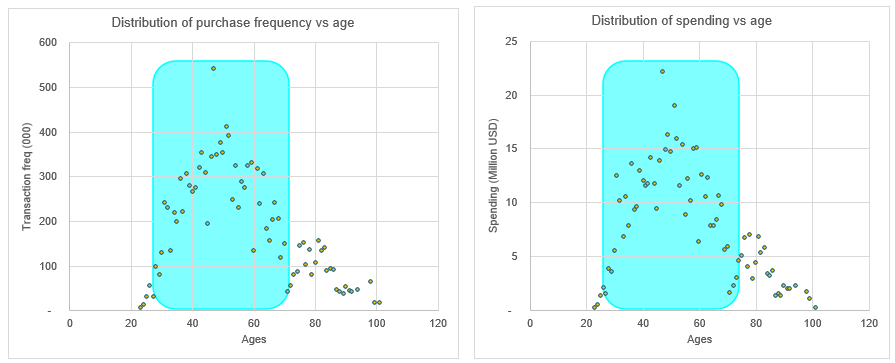

With 80% of transaction (pareto) are driven by ages under 67.
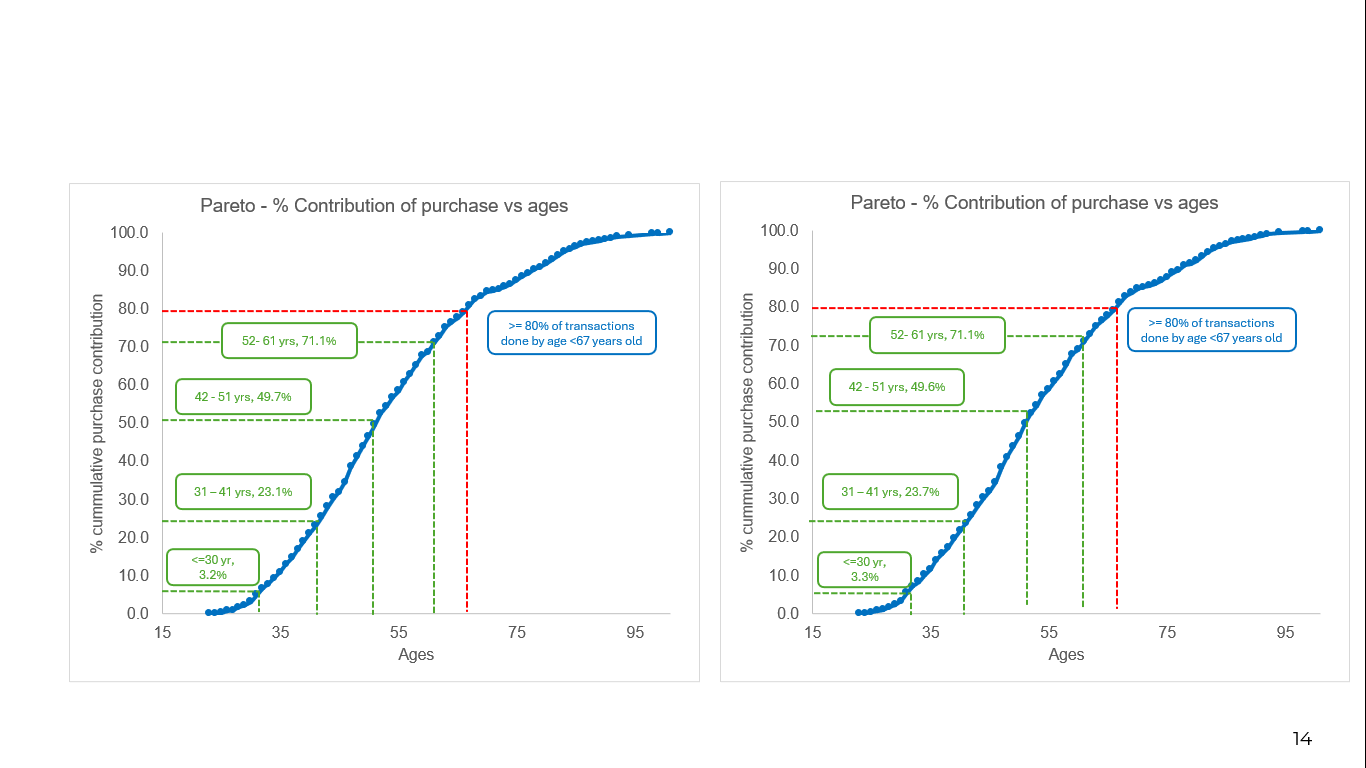

We will proceed further analysis with the age group

<=30, 31-41, 42-51, 52-61, 62-67, 67+

We can check for the trended analysis for these age groups.

Hence in this code, we retrieve the number of transactin, amount for each age group in trended

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  CASE
    WHEN u.current_age BETWEEN 0 AND 30 THEN '<=30'
    WHEN u.current_age BETWEEN 31 AND 41 THEN '31-41'
    WHEN u.current_age BETWEEN 42 AND 51 THEN '42-51'
    WHEN u.current_age BETWEEN 52 AND 61 THEN '52-61'
    WHEN u.current_age BETWEEN 62 AND 67 THEN '62-67'
    ELSE '67+'
  END                                   AS age_band,
  COUNT(t.id)                           AS total_frequency,
  COUNT(DISTINCT t.client_id)           AS active_users,
  SUM(t.amount)                         AS total_amount
FROM `data_analysis.transactions` AS t
JOIN `data_analysis.users`        AS u
  ON t.client_id = u.id
WHERE EXTRACT(YEAR FROM t.`date`) BETWEEN 2010 AND 2019
  AND u.current_age IS NOT NULL
GROUP BY age_band
ORDER BY CASE age_band
  WHEN '<=30' THEN 1 WHEN '31-41' THEN 2 WHEN '42-51' THEN 3
  WHEN '52-61' THEN 4 WHEN '62-67' THEN 5 ELSE 6 END;

"""


## Age to Debt Ratio

One of the aspect in financial industry is also the debt and debt-to-income ratio.

We can observe the trend of the consumer by ages, how's the specific age spend their money/income indicate by this ratio

To ease the process, we can use the simple analysis by utilizing the average of debt and average of yearly income

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

SELECT
  CASE
    WHEN u.current_age BETWEEN 0 AND 30 THEN '<=30'
    WHEN u.current_age BETWEEN 31 AND 41 THEN '31-41'
    WHEN u.current_age BETWEEN 42 AND 51 THEN '42-51'
    WHEN u.current_age BETWEEN 52 AND 61 THEN '52-61'
    WHEN u.current_age BETWEEN 62 AND 67 THEN '62-67'
    ELSE '67+'
  END AS age_band,
  AVG(u.total_debt)    AS avg_debt,
  AVG(u.yearly_income) AS avg_yearly_income
FROM `data_analysis.users` AS u
WHERE u.current_age IS NOT NULL
GROUP BY age_band
ORDER BY CASE age_band
  WHEN '<=30' THEN 1 WHEN '31-41' THEN 2 WHEN '42-51' THEN 3
  WHEN '52-61' THEN 4 WHEN '62-67' THEN 5 ELSE 6 END;

"""


## Payment Type trend for each age group

After understanding the specific group that drive the transaction, and their spending behaviour.

We now try to check for their transaction preference

Do specific age group prefer or has increasing trend in certain payment type (e.g : online purchase)

To achieve this, we check for the trended data of amount, number of transaction, and number of active users (to calculate spend/capita) for each group and payment type (indicated by 'use_chip' column)

In [ ]:
# SQL QUERY : (take out the """" before applying)

"""

WITH base AS (
  SELECT
    EXTRACT(YEAR FROM t.`date`) AS year,
    CASE
      WHEN u.current_age BETWEEN 0  AND 30 THEN '<=30'
      WHEN u.current_age BETWEEN 31 AND 41 THEN '31-41'
      WHEN u.current_age BETWEEN 42 AND 51 THEN '42-51'
      WHEN u.current_age BETWEEN 52 AND 61 THEN '52-61'
      WHEN u.current_age BETWEEN 62 AND 67 THEN '62-67'
      ELSE '67+'
    END AS age_band,
    COALESCE(CAST(t.use_chip AS STRING), 'Unknown') AS use_chip,
    t.id,
    t.amount
  FROM `data_analysis.transactions` AS t
  JOIN `data_analysis.users`        AS u
    ON t.client_id = u.id
  WHERE EXTRACT(YEAR FROM t.`date`) BETWEEN 2010 AND 2019
    AND u.current_age IS NOT NULL
)
SELECT
  year,
  age_band,
  use_chip,
  COUNT(id)   AS total_frequency,
  SUM(amount) AS total_amount
FROM base
GROUP BY year, age_band, use_chip
ORDER BY
  year,
  CASE age_band
    WHEN '<=30' THEN 1
    WHEN '31-41' THEN 2
    WHEN '42-51' THEN 3
    WHEN '52-61' THEN 4
    WHEN '62-67' THEN 5
    ELSE 6
  END,
  use_chip;

"""